<a href="https://colab.research.google.com/github/irfixq/Avocado_King/blob/main/Avocado_King.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avocado Price Prediction for Avocado King

## System Configuration

In [196]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('max_rows', 30000)

import matplotlib # collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns # visualizing distributions data
from scipy import stats # visualizing probability distribution of statistical function

import warnings # ignore warnings
warnings.filterwarnings('ignore')

from google.colab import data_table # to show full data table in multiple pages
%load_ext google.colab.data_table


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [197]:
## Check system and python dependencies version
print("Python version: {}". format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
print("matplotlib version: {}". format(matplotlib.__version__))

Python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
NumPy version: 1.19.5
pandas version: 1.1.5
matplotlib version: 3.2.2


There are 2 options to get the data, either from GitHub or Google Drive.
In this case, I prefer to use Git Clone since it will be easier for user to access the repo instead of loading everything into their Google Drive or local.

In [198]:
## Clone repo from GitHub
! git clone 'https://github.com/irfixq/Avocado_King'

fatal: destination path 'Avocado_King' already exists and is not an empty directory.


In [199]:
## Mount Google Drive to get data
## make sure you uploaded the folder into your Google Drive first

#from google.colab import drive 
#drive.mount('/content/drive')

In [200]:
## get working directory
! pwd

## list all folders in working directory
! ls

/content/Avocado_King
Avocado_King	       feature-explanations.xlsx  README.md
Avocado_King.ipynb     google-data.csv		  states.csv
dfnew_price.csv        outliers.csv
df_price_NA_check.csv  price-and-sales-data.csv


In [201]:
## change working directory to github folder
import os
os.chdir('/content/Avocado_King')


In [202]:
## check working directory after change path
! pwd
! ls

/content/Avocado_King
Avocado_King	       feature-explanations.xlsx  README.md
Avocado_King.ipynb     google-data.csv		  states.csv
dfnew_price.csv        outliers.csv
df_price_NA_check.csv  price-and-sales-data.csv


## Data Pre-Processing

1. Data pre-processing steps:
> * Read dataset  as pandas dataframe
> * Check for df dimension (rows, columns)
> * Check for column names and datatype
> * Drop unused column
> * Check for missing values
> * Handle missing values by using mean values (if any)
> * Check for outliers
> * Check for duplicate values
> * Show cleaned dataset (dfnew_price)

2. Data Distribution
> * Visualization
> * Descriptive Statistics

### 1. Dataset: Price and Sales Data

In [203]:
## see the shape of the dataset (rows, columns)
df_price = pd.read_csv('/content/Avocado_King/price-and-sales-data.csv')
df_price.shape

(25161, 13)

In [204]:
## list all column names
df_price.columns

Index(['Date', 'AveragePrice', 'TotalVolume', '4046', '4225', '4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year',
       'region'],
      dtype='object')

In [205]:
## checking data type of each column
df_price.dtypes

Date             object
AveragePrice    float64
TotalVolume     float64
4046            float64
4225            float64
4770            float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
type             object
year              int64
region           object
dtype: object

In [206]:
## drop unused column such as Date because we already have year
df_price = df_price.drop('Date',1)

In [207]:
## see the dataset
df_price.head(10)

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
2,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,BaltimoreWashington
3,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise
4,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,conventional,2015,Boston
5,1.40,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.00,conventional,2015,BuffaloRochester
6,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California
7,1.19,166006.29,29419.03,47220.75,38568.95,50797.56,NaN,NaN,0.00,conventional,2015,Charlotte
8,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
9,0.88,228569.58,3274.30,168764.78,1447.06,NaN,17525.31,37445.46,112.67,conventional,2015,CincinnatiDayton


In [208]:
## check for missing values in dataset
print(f"Missing data:{df_price.isna().sum(axis=0).any()}") # TRUE represents the dataset has missing data

Missing data:True


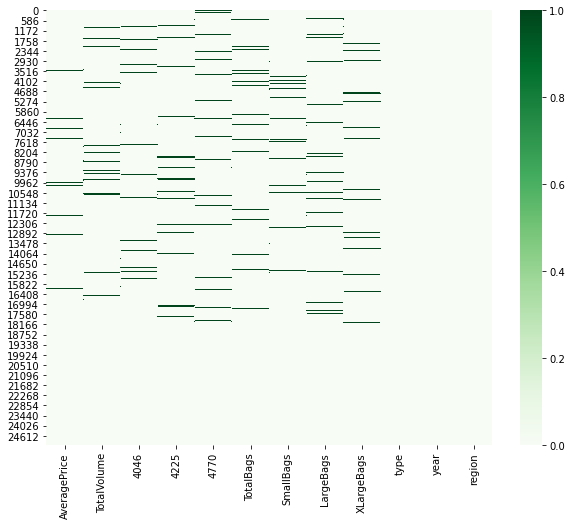

In [209]:
## see distribution of missing values in heat map
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(df_price.isna(),cmap='Greens')

Based on heatmap above, 
the dark marks represent missing values in our dataset. Column 'Date', 'type', 'year', 'region' does not have any missing values.

In [210]:
## See the missing data in dataset
df_price_NA_check = df_price.isna()
df_price_NA_check.head(10)

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,True,False,False,False,False,False,False


In [211]:
## Save as new .csv table to see whole data / for download
df_price_NA_check.to_csv('df_price_NA_check.csv',sep=',')

In [244]:
## there are 2 option to handle missing data
# option 1 = eliminate data point that contain missing values (not recommended as you might missed important data for other attribute)
# option 2 = substitue missing value with avg value of the attribute

dfnew_price = df_price.fillna(df_price.mean())
dfnew_price.head(10)

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1.220000,40873.28,2819.50,28287.42,49.90,9716.460000,9186.93000,529.530000,0.00,conventional,2015,Albany
1,1.000000,435021.49,364302.39,23821.16,82.15,46815.790000,16707.15000,30108.640000,0.00,conventional,2015,Atlanta
2,1.396018,788025.06,53987.31,552906.04,39995.03,141136.680000,137146.07000,3990.610000,0.00,conventional,2015,BaltimoreWashington
3,1.010000,80034.32,44562.12,24964.23,2752.35,7755.620000,6064.30000,1691.320000,0.00,conventional,2015,Boise
4,1.020000,491738.00,7193.87,396752.18,128.82,87663.130000,87406.84000,256.290000,0.00,conventional,2015,Boston
5,1.400000,116253.44,3267.97,55693.04,109.55,57182.880000,57182.88000,0.000000,0.00,conventional,2015,BuffaloRochester
6,0.930000,5777334.90,2843648.26,2267755.26,137479.64,528451.740000,477193.38000,47882.560000,3375.80,conventional,2015,California
7,1.190000,166006.29,29419.03,47220.75,38568.95,50797.560000,212419.88482,75899.237988,0.00,conventional,2015,Charlotte
8,1.110000,783068.03,30270.26,550752.19,124506.10,77539.480000,72888.46000,4651.020000,0.00,conventional,2015,Chicago
9,0.880000,228569.58,3274.30,168764.78,1447.06,295043.209471,17525.31000,37445.460000,112.67,conventional,2015,CincinnatiDayton


In [213]:
## check for dataset after impute missing values
print(f"Missing data:{dfnew_price.isna().sum(axis=0).any()}")  # FALSE represent there is no missing values anymore in the dataset

Missing data:False


In [214]:
## see new dataset after substitue missing values / for download
dfnew_price.to_csv('dfnew_price.csv',sep=',')

In [215]:
## Check for outliers
outliers = dfnew_price.describe()
outliers

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,25161.000000,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,25161.000000,25161.000000
mean,1.396018,9.170913e+05,2.981530e+05,2.958284e+05,2.246362e+04,2.950432e+05,2.124199e+05,7.589924e+04,4405.638467,2016.776877
std,0.377521,3.660879e+06,1.265327e+06,1.187469e+06,1.027392e+05,1.210964e+06,8.530163e+05,3.517944e+05,25357.440983,1.323978
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.120000,1.400096e+04,9.223600e+02,3.284480e+03,0.000000e+00,7.733600e+03,5.244730e+03,2.888900e+02,0.000000,2016.000000
50%,1.380000,1.363315e+05,1.225826e+04,3.093655e+04,2.520000e+02,5.105029e+04,3.537269e+04,4.757530e+03,0.000000,2017.000000
75%,1.620000,5.638524e+05,1.358825e+05,1.921057e+05,8.008860e+03,1.632409e+05,1.159123e+05,3.744130e+04,593.800000,2018.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,7.864297e+06,844929.830000,2019.000000


Based on above table, there is no outliers within the dataset because all mean values lie in between min and max values of the distribution.


In [216]:
## Save as new .csv file / for download
outliers.to_csv('outliers.csv',sep=',')

In [217]:
## Check for duplicate values in dataset
print('Duplicated values = ',sum(dfnew_price.duplicated()))

Duplicated values =  0


In [218]:
## Checking each features of the cleaned dataset
dfnew_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25161 entries, 0 to 25160
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  25161 non-null  float64
 1   TotalVolume   25161 non-null  float64
 2   4046          25161 non-null  float64
 3   4225          25161 non-null  float64
 4   4770          25161 non-null  float64
 5   TotalBags     25161 non-null  float64
 6   SmallBags     25161 non-null  float64
 7   LargeBags     25161 non-null  float64
 8   XLargeBags    25161 non-null  float64
 9   type          25161 non-null  object 
 10  year          25161 non-null  int64  
 11  region        25161 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 2.3+ MB


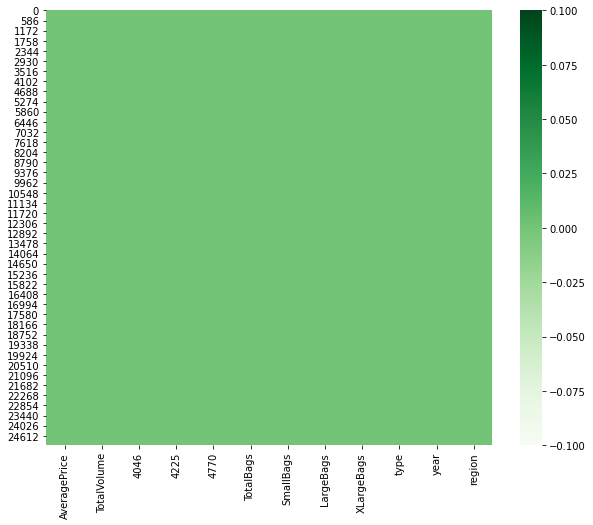

In [219]:
## see distribution of cleaned dataset in heat map
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(dfnew_price.isna(),cmap='Greens')

##### Conclusions
* Features = 13
* Instances = 25,161
* No duplicate values
* No null values after imputing the missing values with mean of the attribute itself
* Features with datatype = 'object' could be the machine learning classifier which are; 'type' & 'region'

### 2. Features Exploration
To understand how the variables are distributed. 

#### Data Distribution

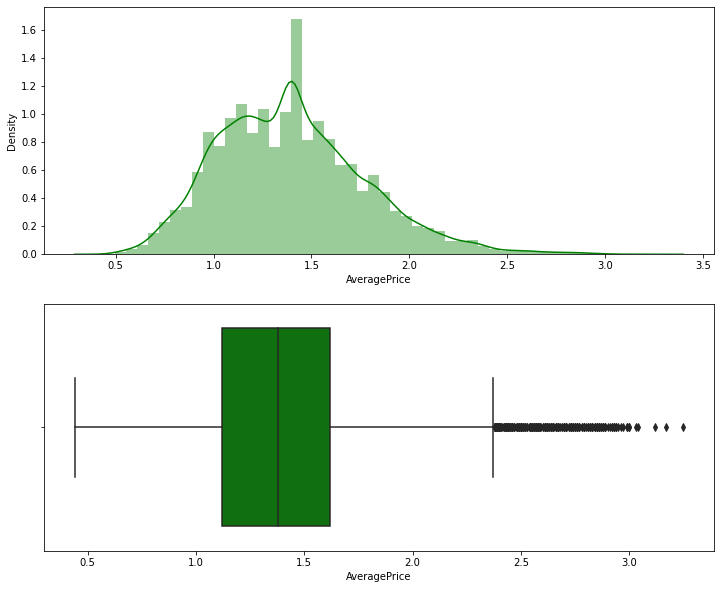

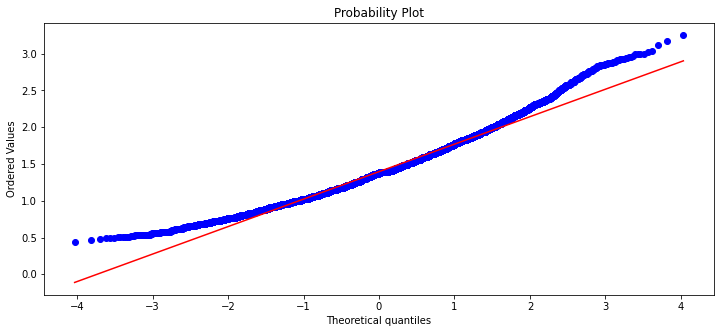

In [220]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
# Univriate distribution plot
# by default the kernel density estimation is TRUE; to see continuous density by smoothing the observation using Gaussian kernel fx
sns.distplot(dfnew_price.AveragePrice, color='green', ax=ax[0])
# Box plot
sns.boxplot(dfnew_price.AveragePrice, color='green',ax=ax[1])

## see probability distribution of avg price
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
# Probability distribution
stats.probplot(dfnew_price['AveragePrice'], plot=ax)
plt.show()

##### Conclusions from visualizing the data distribution

* All 3 plots above showed bimodal distribution which telling us that we have 2 local maximum.
* As discussed earlier, our potential classifier could be Type and Region which in this case Type has 2 class (Organic & Conventional)

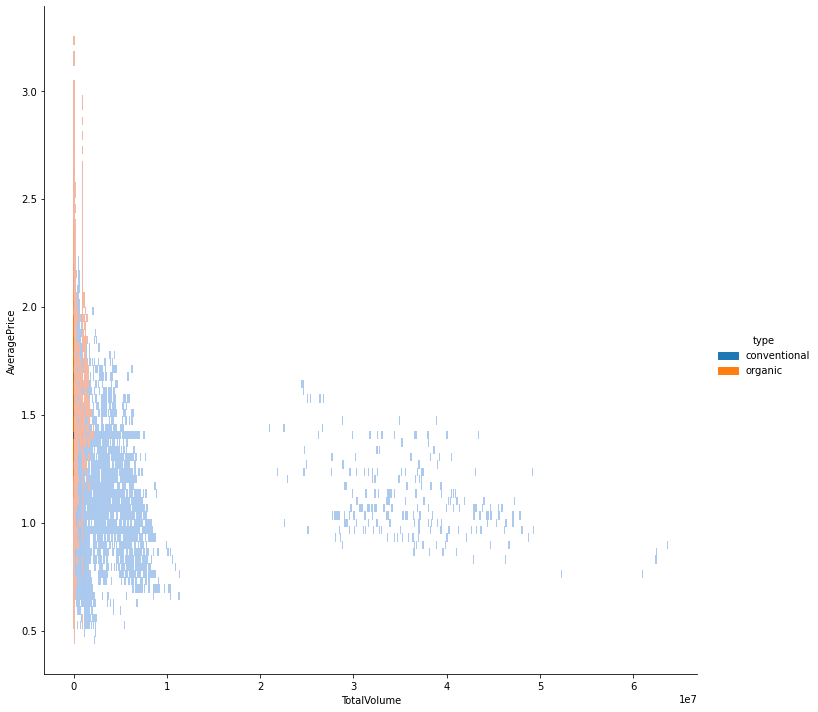

In [221]:
# Bivariate distribution plot of average price against total volume for each avocade type (class: Organic & Conventional)
sns.displot(dfnew_price, x='TotalVolume', y='AveragePrice',hue='type',height=10)

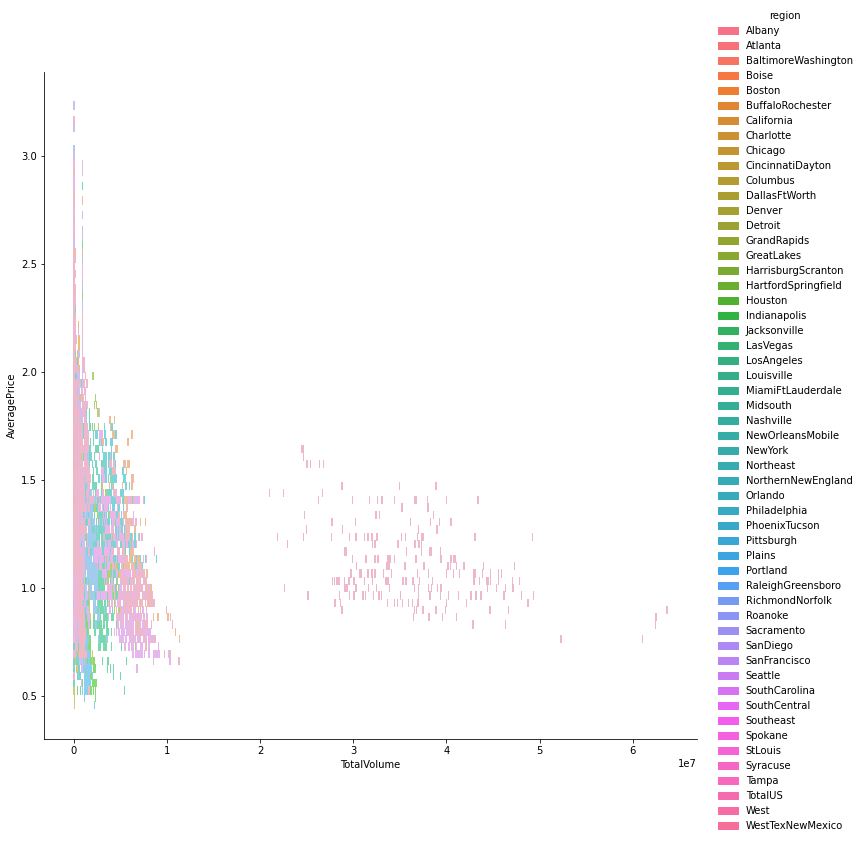

In [222]:
# Bivariate distribution plot of average price against total volume for all region
sns.displot(dfnew_price, x='TotalVolume', y='AveragePrice',hue='region',height=10)

##### Conclusions from Bivariate Distribution plot

* Based on the bivariate distribution plot above, we can see that more conventional avocado has been sold compared to organic avocado.
* Organic avocado was selling at higher price compared to conventional avocado.
* It is better to get dataset about states so that it can be group into region (East, West, South, North) for easier classification.
* class = 'type' seems to have better distribution than class = 'region'. New, we will see the exact distribution in feature selection.

#### Descriptive Statistics
* Skewness
* Kurtosis

**Skewness**
* Measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry).

In [223]:
print("Skewness: %f" % dfnew_price['AveragePrice'].skew())

Skewness: 0.602213


**Kurtosis**
* Measure the heaviness of distribution tails w.r.t. skewness.

In [224]:
## Kurtosis: Measure heaviness of the distribution tails
print("Kurtosis: %f" % dfnew_price['AveragePrice'].kurt())

Kurtosis: 0.558097


##### Conclusions
* If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data.
* If skewness is less than -1 or greater than 1, the distribution is highly skewed.
***If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.**
* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
***Positive Kurtosis value means more data in the tail of the distribution.**
* Excess kurtosis = kurtosis - 3 = -2.442; which represent that we have lighter tail than normal distribution.

### 3. Features Extraction

#### Class: 'type'


In [245]:
df_conventional = dfnew_price[dfnew_price['type'] == 'conventional']
print("Conventional Avocado = ",df_conventional.shape)

df_organic = dfnew_price[dfnew_price['type'] == 'organic']
print("Organic Avocado = ",df_organic.shape)

Conventional Avocado =  (12582, 12)
Organic Avocado =  (12579, 12)


Conventional avocado has 3 more data points than organic avocado

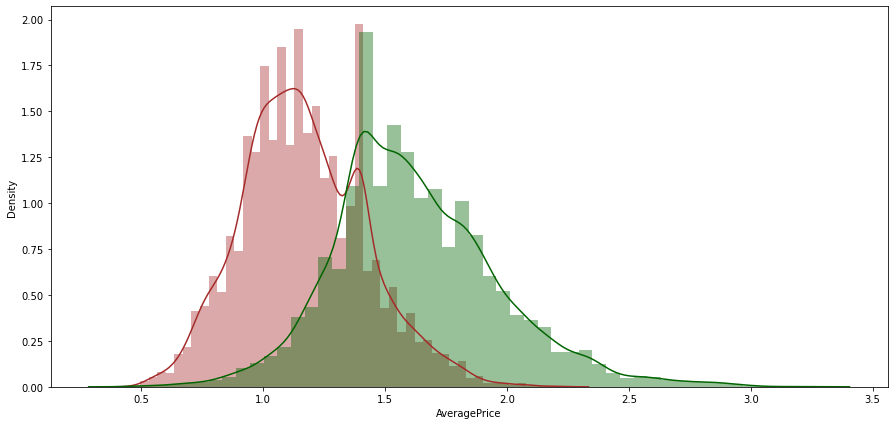

In [246]:
## Create histogram to see data distribution of both class in 'type'

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
sns.distplot(df_conventional['AveragePrice'],color='brown') # conventional avocado
sns.distplot(df_organic['AveragePrice'],color='darkgreen') # organic avocado
plt.show()

In [227]:
## Calculate 'Measure of Spread' for AveragePrice of the CONVENTIONAL avocado dataset
df_conventional['AveragePrice'].describe()

count    12582.000000
mean         1.167764
std          0.252855
min          0.460000
25%          0.990000
50%          1.150000
75%          1.340000
max          2.220000
Name: AveragePrice, dtype: float64

In [228]:
## Calculate 'Measure of Spread' for AveragePrice of the ORGANIC avocado dataset
df_organic['AveragePrice'].describe()

count    12579.000000
mean         1.624326
std          0.341897
min          0.440000
25%          1.396018
50%          1.580000
75%          1.820000
max          3.250000
Name: AveragePrice, dtype: float64

Visualize the 'Measure of Spread' calculated for AveragePrice of both class using Boxplot function.
https://www.statisticshowto.com/probability-and-statistics/descriptive-statistics/box-plot/

---



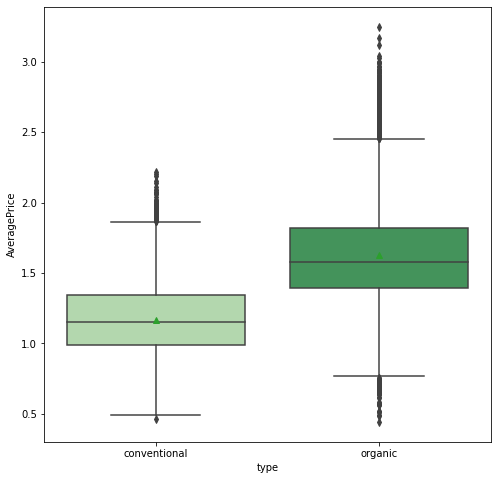

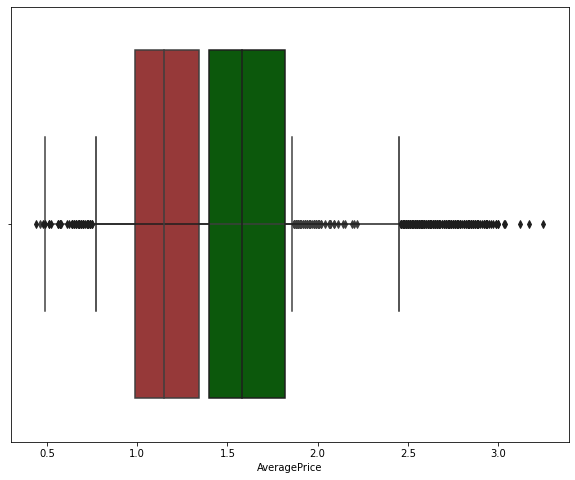

In [229]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
sns.boxplot(x='type',y='AveragePrice',data=dfnew_price,palette='Greens',showmeans=True)
plt.show()

# Can also visualize in combined boxplot by running below code
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.boxplot(df_conventional['AveragePrice'],color='brown')
sns.boxplot(df_organic['AveragePrice'],color='darkgreen')
plt.show()

#### Class: 'region'


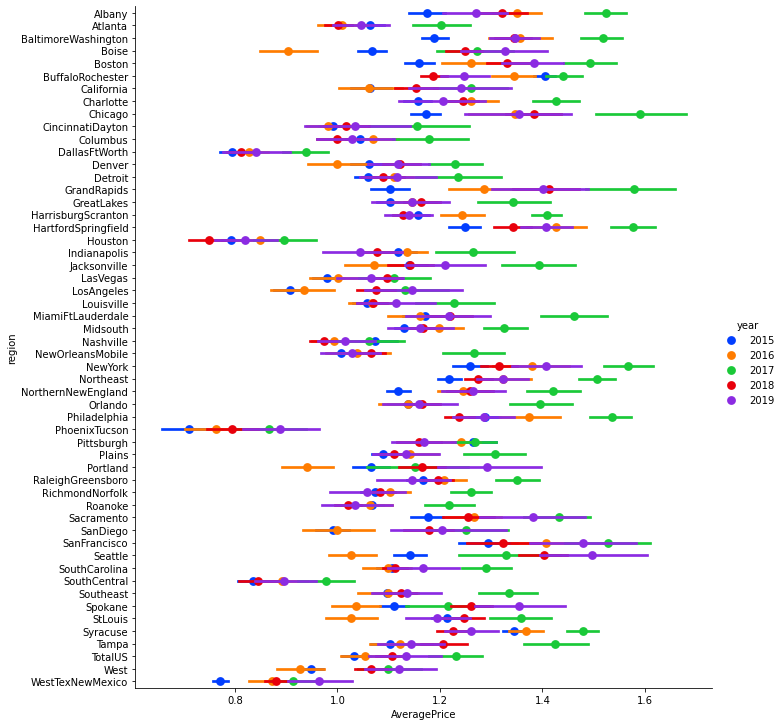

In [230]:
## Average price of CONVENTIONAL avocado in each year by region
conventional = dfnew_price['type']=='conventional'
conv_price_byyear_byregion = sns.factorplot('AveragePrice','region',data=dfnew_price[conventional],hue='year',size=10,palette='bright',join=False)

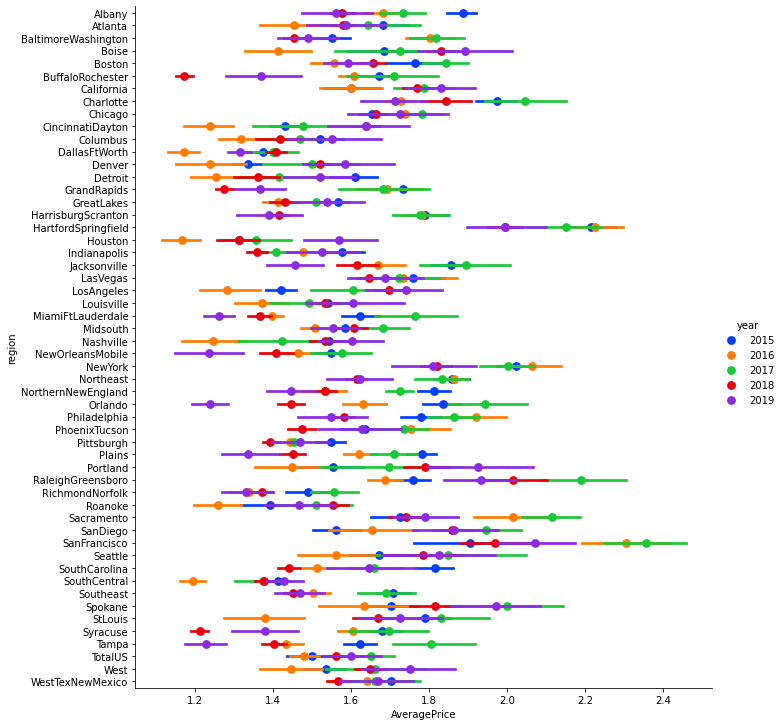

In [231]:
## Average price of ORGANIC avocado in each year by region
organic = dfnew_price['type']=='organic'
organic_price_byyear_byregion = sns.factorplot('AveragePrice','region',data=dfnew_price[organic],hue='year',size=10,palette='bright',join=False)

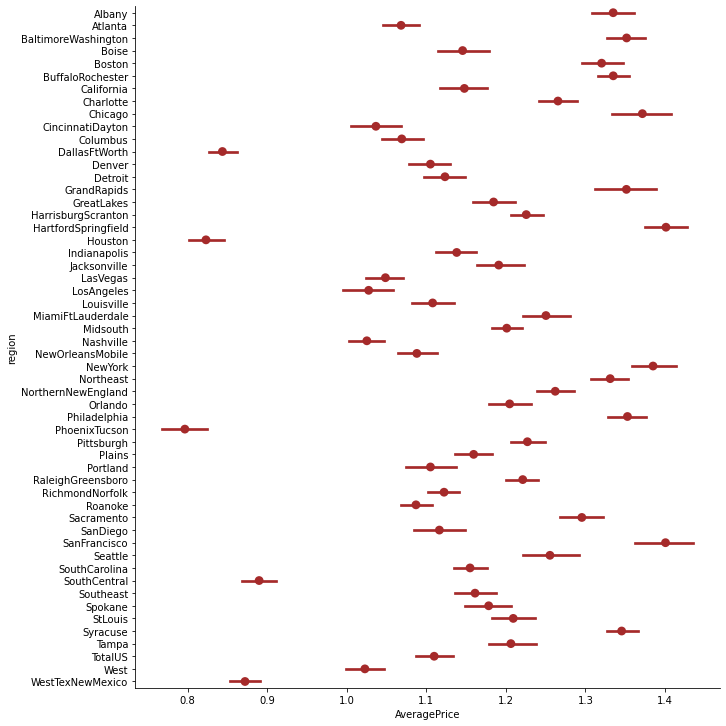

In [232]:
## Average price of conventional avocado by region (average from year 2015-2019)
conventional_factorplot = sns.factorplot('AveragePrice','region',data=dfnew_price[conventional],color='brown',size=10,join=False,)

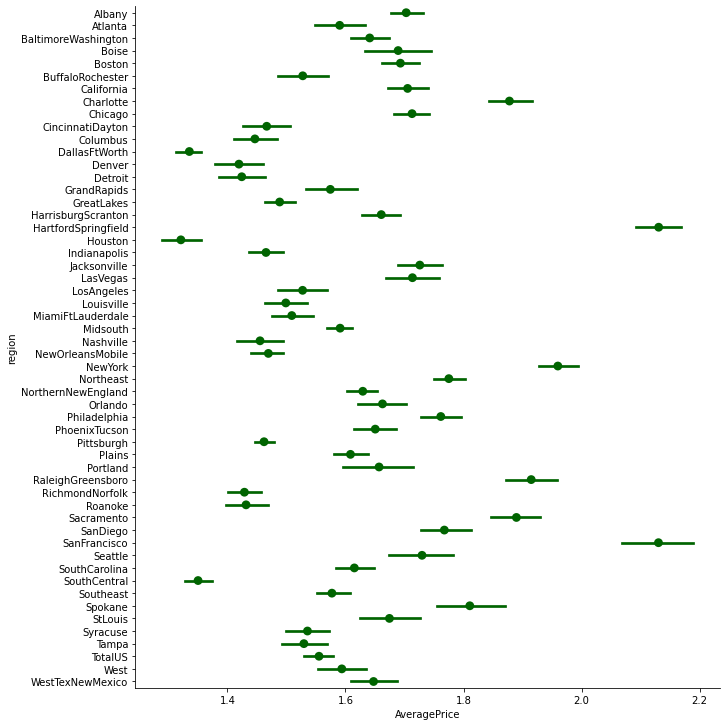

In [233]:
## Average price of organic avocado by region (average from year 2015-2019)
organic_factorplot = sns.factorplot('AveragePrice','region',data=dfnew_price[organic],color='darkgreen',size=10,join=False)

#### Correlation Matrix

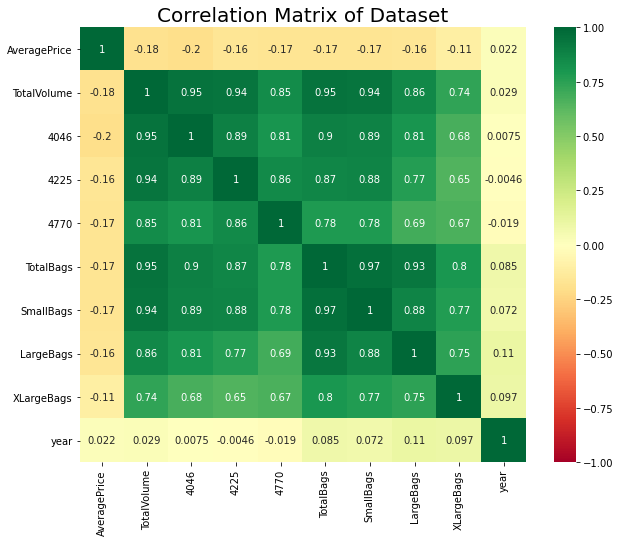

In [234]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
ax.set_title("Correlation Matrix of Dataset", fontsize=20)
sns.heatmap(dfnew_price.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True)

#### Conclusions
* Not only class 'type' that affect the average price but also 'region'.
* AveragePrice for each region is different for every year.
* 'type' shows more balanced data points as compared to 'region'
* Based on correlation matrix, 'TotalVolume' and 'TotalBags' show strongest correlation.


## Clean Dataset

In [247]:
dfnew_price.type.unique()

array(['conventional', 'organic'], dtype=object)

In [248]:
dfnew_price.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Label Encoding 'type' and 'region' column to convert to numerical data.
We can also select 1 type and 1 region to do our prediction, but its going to so lengthy as we have 53 regions.

Hence, i decided to encode object datatype to numerical instead and do the analysis for all at once.

In [249]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_clean = dfnew_price ## reassign as new df before encode

df_clean['region'] = le.fit_transform(df_clean['region'])
df_clean['type'] = le.fit_transform(df_clean['type'])

df_clean.head()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,2015,0
1,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,2015,1
2,1.396018,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,0,2015,2
3,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,0,2015,3
4,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,0,2015,4


In [250]:
df_clean.type.unique()

array([0, 1])

In [251]:
df_clean.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [252]:
## check legend after encodede the avocado type (just to be sure)

df_type_0 = df_clean[df_clean['type'] == 0]  ## conventional avocado
print("Conventional Avocado / 0 = ",df_type_0.shape)

df_type_1 = df_clean[df_clean['type'] == 1]  ## organic avocado
print("Organic Avocado / 1      = ",df_type_1.shape)

Conventional Avocado / 0 =  (12582, 12)
Organic Avocado / 1      =  (12579, 12)


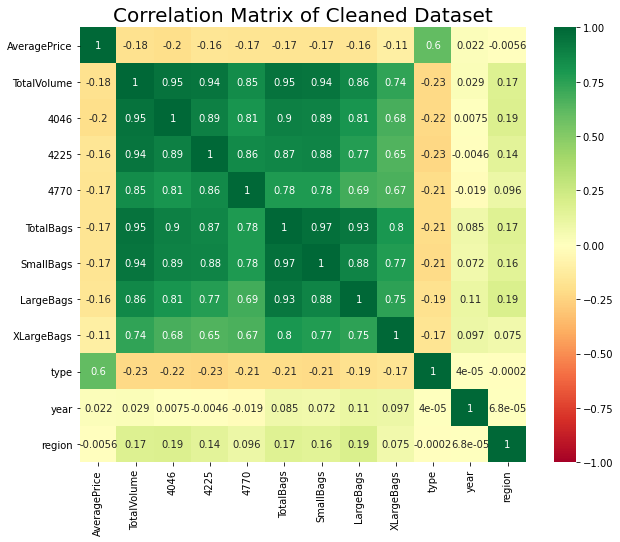

In [253]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
ax.set_title("Correlation Matrix of Cleaned Dataset", fontsize=20)
sns.heatmap(df_clean.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True)

##### Conclusions
* Mild correlation between AveragePrice - type, year and region after converting string to numerical datatype.

## Feature Engineering

#### Graphical Analysis

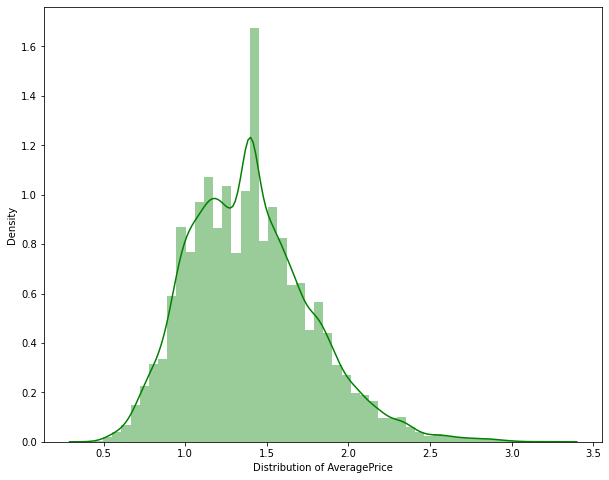

In [254]:
## Distribution of AveragePrice in cleaned dataset
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.distplot(df_clean["AveragePrice"],axlabel="Distribution of AveragePrice", color='green')

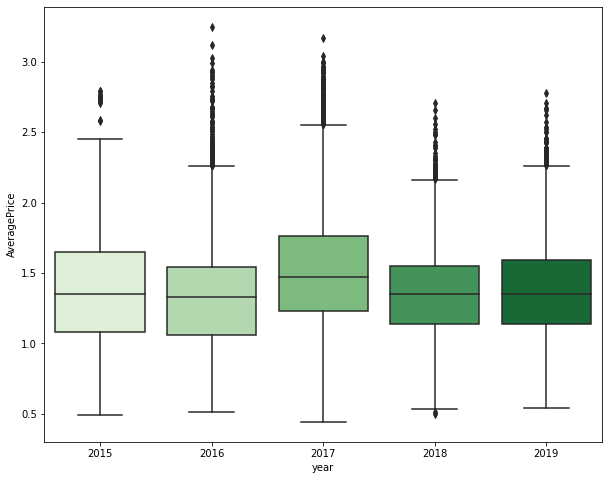

In [255]:
## AveragePrice of avocado each year
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.boxplot(x="year", y="AveragePrice", data=df_clean, palette='Greens')

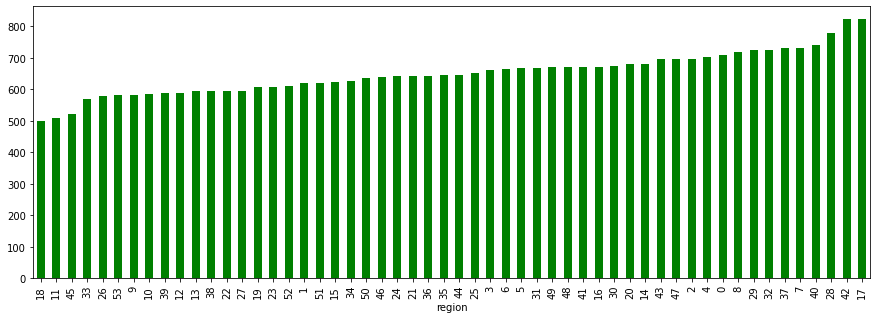

In [260]:
df_clean.groupby("region")["AveragePrice"].sum().sort_values(ascending=True).plot(kind='bar',color='g',figsize=(15,5))

##### Conclusions
* AveragePrice range from USD1.20 to USD1.40
* year=2017 has highest AveragePrice
* AveragePrice is varies according to region 
* region=17 (HartfordSpringfield) has highest count of buying avocado at their AveragePrice.

## Prediction using Linear Regression

train_test_split = https://realpython.com/train-test-split-python-data/

##### Model 1
Based on 2 correlation matrices above, Model 1 only get important data / features that show strongest correlation.

In [288]:
## Select columns that will be used to create train and test dataset
model_1 = df_clean[['AveragePrice','TotalVolume','TotalBags','region','type','year']]
model_1.head(10)

,AveragePrice,TotalVolume,TotalBags,region,type,year
0,1.220000,40873.28,9716.460000,0,0,2015
1,1.000000,435021.49,46815.790000,1,0,2015
2,1.396018,788025.06,141136.680000,2,0,2015
3,1.010000,80034.32,7755.620000,3,0,2015
4,1.020000,491738.00,87663.130000,4,0,2015
5,1.400000,116253.44,57182.880000,5,0,2015
6,0.930000,5777334.90,528451.740000,6,0,2015
7,1.190000,166006.29,50797.560000,7,0,2015
8,1.110000,783068.03,77539.480000,8,0,2015
9,0.880000,228569.58,295043.209471,9,0,2015


In [289]:
from sklearn.model_selection import train_test_split

X1=model_1[['AveragePrice','TotalVolume','TotalBags','region','type','year']] 
y1=model_1.type # independent var / predictor

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=1)

print("Shape of each Dataset : ")
print("X Train Shape = ",X1_train.shape)
print("Y Train Shape = ",y1_train.shape)
print("X Test Shape  = ",X1_test.shape)
print("Y Test Shape  = ",y1_test.shape)

Shape of each Dataset : 
X Train Shape =  (20128, 6)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 6)
Y Test Shape  =  (5033,)


In [290]:
## Standardization of dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(model_1) # compute the mean and std to be used for later scaling.
model_1_std = scaler.transform(model_1) # perform standardization by centering and scaling
model_1 = pd.DataFrame(model_1_std) # convert from array to dataframe
model_1.columns = ['AveragePrice','TotalVolume','TotalBags','region','type','year'] # assign column names
model_1.head(10)

,AveragePrice,TotalVolume,TotalBags,region,type,year
0,-4.662560e-01,-0.239351,-2.356242e-01,-1.700256,-0.999881,-1.342101
1,-1.049017e+00,-0.131684,-2.049874e-01,-1.636088,-0.999881,-1.342101
2,-1.764530e-14,-0.035256,-1.270968e-01,-1.571920,-0.999881,-1.342101
3,-1.022527e+00,-0.228654,-2.372435e-01,-1.507752,-0.999881,-1.342101
4,-9.960384e-01,-0.116191,-1.712555e-01,-1.443583,-0.999881,-1.342101
5,1.054804e-02,-0.218760,-1.964262e-01,-1.379415,-0.999881,-1.342101
6,-1.234440e+00,1.327643,1.927499e-01,-1.315247,-0.999881,-1.342101
7,-5.457234e-01,-0.205169,-2.016993e-01,-1.251078,-0.999881,-1.342101
8,-7.576363e-01,-0.036610,-1.796156e-01,-1.186910,-0.999881,-1.342101
9,-1.366886e+00,-0.188079,1.922727e-15,-1.122742,-0.999881,-1.342101


In [291]:
## create list using feature columns
model_1_features = ['TotalVolume','TotalBags','region','type','year']

# use above list to select subset of original dataframe
X1 = model_1[model_1_features]
y1 = model_1.AveragePrice # dependent variable / output

X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, test_size=0.20, random_state=1) 

print("Shape of each New Dataset : ")
print("X Train Shape = ",X1_train.shape)
print("Y Train Shape = ",y1_train.shape)
print("X Test Shape  = ",X1_test.shape)
print("Y Test Shape  = ",y1_test.shape)

Shape of each New Dataset : 
X Train Shape =  (20128, 5)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 5)
Y Test Shape  =  (5033,)


In [292]:
from sklearn.linear_model import LinearRegression

LR1 = LinearRegression()
LR1.fit(X1_train, y1_train) 

model_1_features.insert(0,'Intercept')
coef = LR1.coef_.tolist()
coef.insert(0, LR1.intercept_)
eq1 = zip(model_1_features, coef)

for model_1_features,coef in eq1:
    print(model_1_features," = " ,round(coef,5))

y1_pred_train = LR1.predict(X1_train)
y1_pred_test = LR1.predict(X1_test)

Intercept  =  -0.00016
TotalVolume  =  -0.06157
TotalBags  =  0.01236
region  =  0.00279
type  =  0.59591
year  =  0.01905


##### Model 2
Adding more features to test on accuracy score

In [293]:
## Select columns that will be used to create train and test dataset
model_2 = df_clean
model_2.head()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,2015,0
1,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,2015,1
2,1.396018,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,0,2015,2
3,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,0,2015,3
4,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,0,2015,4


In [294]:
from sklearn.model_selection import train_test_split

X2=model_2[['AveragePrice','TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','XLargeBags','type','year','region']] 
y2=model_2.type # independent var / predictor

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=1)

print("Shape of each Dataset : ")
print("X Train Shape = ",X2_train.shape)
print("Y Train Shape = ",y2_train.shape)
print("X Test Shape  = ",X2_test.shape)
print("Y Test Shape  = ",y2_test.shape)

Shape of each Dataset : 
X Train Shape =  (20128, 12)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 12)
Y Test Shape  =  (5033,)


In [295]:
## Standardization of dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(model_2) # compute the mean and std to be used for later scaling.
model_2_std = scaler.transform(model_2) # perform standardization by centering and scaling
model_2 = pd.DataFrame(model_2_std) # convert from array to dataframe
model_2.columns = ['AveragePrice','TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','XLargeBags','type','year','region'] # assign column names
model_2.head(10)

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,-4.662560e-01,-0.239351,-0.233410,-0.225308,-0.218166,-2.356242e-01,-2.382569e-01,-2.142479e-01,-0.173745,-0.999881,-1.342101,-1.700256
1,-1.049017e+00,-0.131684,0.052280,-0.229069,-0.217852,-2.049874e-01,-2.294407e-01,-1.301656e-01,-0.173745,-0.999881,-1.342101,-1.636088
2,-1.764530e-14,-0.035256,-0.192970,0.216496,0.170643,-1.270968e-01,-8.824604e-02,-2.044094e-01,-0.173745,-0.999881,-1.342101,-1.571920
3,-1.022527e+00,-0.228654,-0.200419,-0.228107,-0.191861,-2.372435e-01,-2.419176e-01,-2.109454e-01,-0.173745,-0.999881,-1.342101,-1.507752
4,-9.960384e-01,-0.116191,-0.229952,0.084992,-0.217398,-1.712555e-01,-1.465570e-01,-2.150246e-01,-0.173745,-0.999881,-1.342101,-1.443583
5,1.054804e-02,-0.218760,-0.233055,-0.202229,-0.217585,-1.964262e-01,-1.819896e-01,-2.157532e-01,-0.173745,-0.999881,-1.342101,-1.379415
6,-1.234440e+00,1.327643,2.011770,1.660646,1.119517,1.927499e-01,3.104029e-01,-7.964094e-02,-0.040614,-0.999881,-1.342101,-1.315247
7,-5.457234e-01,-0.205169,-0.212387,-0.209363,0.156762,-2.016993e-01,1.364776e-15,1.613261e-15,-0.173745,-0.999881,-1.342101,-1.251078
8,-7.576363e-01,-0.036610,-0.211715,0.214682,0.993238,-1.796156e-01,-1.635774e-01,-2.025321e-01,-0.173745,-0.999881,-1.342101,-1.186910
9,-1.366886e+00,-0.188079,-0.233050,-0.107006,-0.204566,1.922727e-15,-2.284815e-01,-1.093097e-01,-0.169302,-0.999881,-1.342101,-1.122742


In [308]:
## create list using feature columns
model_2_features = ['AveragePrice','TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','XLargeBags','type','year','region']

# use above list to select subset of original dataframe
X2 = model_2[model_2_features]
y2 = model_2.AveragePrice # dependent variable / output

X2_train, X2_test, y2_train, y2_test=train_test_split(X2, y2, test_size=0.20, random_state=1) 

print("Shape of each New Dataset : ")
print("X Train Shape = ",X2_train.shape)
print("Y Train Shape = ",y2_train.shape)
print("X Test Shape  = ",X2_test.shape)
print("Y Test Shape  = ",y2_test.shape)

Shape of each New Dataset : 
X Train Shape =  (20128, 12)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 12)
Y Test Shape  =  (5033,)


In [309]:
from sklearn.linear_model import LinearRegression

LR2 = LinearRegression()
LR2.fit(X2_train, y2_train) 

model_2_features.insert(0,'Intercept')
coef = LR2.coef_.tolist()
coef.insert(0, LR2.intercept_)
eq1 = zip(model_2_features, coef)

for model_2_features,coef in eq1:
    print(model_2_features," = " ,coef)

y2_pred_train = LR2.predict(X2_train)
y2_pred_test = LR2.predict(X2_test)

Intercept  =  5.204170427930421e-18
AveragePrice  =  1.000000000000001
TotalVolume  =  6.793114728140772e-17
4046  =  1.2368496500919759e-17
4225  =  -3.103010209712759e-17
4770  =  -1.126827369660491e-16
TotalBags  =  1.0494039546098403e-16
SmallBags  =  1.442332328784925e-16
LargeBags  =  1.594767325772736e-16
XLargeBags  =  5.060758081690738e-17
type  =  8.808227229274119e-16
year  =  9.495593210942021e-17
region  =  6.473210813957569e-17


## Evaluation Methods


In [ ]:
from sklearn import metrics

#### Model 1

##### Root Mean Square Error (RMSE)

In [302]:
print("Model Evaluation for Linear Regression Model 1 using RMSE")

RMSE_train_1 = np.sqrt( metrics.mean_squared_error(y1_train, y1_pred_train))
RMSE_test_1 = np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_test))
print('RMSE for training set is {}'.format(round(RMSE_train_1,3)),' and RMSE for test set is {}'.format(round(RMSE_test_1,3)))

Model Evaluation for Linear Regression Model 1 using RMSE
RMSE for training set is 0.797  and RMSE for test set is 0.787


##### R-square (R2)

In [299]:
print("Model 1 - R2 score for TRAINING dataset")
print("")

yhat_1 = LR1.predict(X1_train)
SS_Residual_1 = sum((y1_train-yhat_1)**2)
SS_Total_1 = sum((y1_train-np.mean(y1_train))**2)
r_squared_1 = 1 - (float(SS_Residual_1))/SS_Total_1
adjusted_r_squared_1 = 1 - (1-r_squared_1)*(len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1)
print("R2 score          = ",round(r_squared_1,5))
print("Adjusted R2 score = ",round(adjusted_r_squared_1,5))

Model 1 R2 score for TRAINING dataset

R2 score          =  0.36926
Adjusted R2 score =  0.36911


In [300]:
print("Model 1 - R2 score for TEST dataset")
print("")

yhat_1 = LR1.predict(X1_test)
SS_Residual_1 = sum((y1_test-yhat_1)**2)
SS_Total_1 = sum((y1_test-np.mean(y1_test))**2)
r_squared_1 = 1 - (float(SS_Residual_1))/SS_Total_1
adjusted_r_squared_1 = 1 - (1-r_squared_1)*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1)
print("R2 score          = ",round(r_squared_1,5))
print("Adjusted R2 score = ",round(adjusted_r_squared_1,5))

Model 1 R2 score for TEST dataset

R2 score          =  0.36416
Adjusted R2 score =  0.36353


#### Model 2

In [306]:
print("Model Evaluation for Linear Regression Model 2 using RMSE")

RMSE_train_2 = np.sqrt( metrics.mean_squared_error(y2_train, y2_pred_train))
RMSE_test_2 = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_test))
print('RMSE for training set is {}'.format(RMSE_train_2),' and RMSE for test set is {}'.format(RMSE_test_2))

Model Evaluation for Linear Regression Model 2 using RMSE
RMSE for training set is 1.7834503209569997e-15  and RMSE for test set is 1.7621166510326835e-15


In [313]:
print("Model 2 -  R2 score for TRAINING dataset")
print("")

yhat_2 = LR2.predict(X2_train)
SS_Residual_2 = sum((y2_train-yhat_2)**2)
SS_Total_2 = sum((y2_train-np.mean(y2_train))**2)
r_squared_2 = 1 - (float(SS_Residual_2))/SS_Total_2
adjusted_r_squared_2 = 1 - (1-r_squared_2)*(len(y2_train)-1)/(len(y2_train)-X2_train.shape[1]-1)
print("R2 score          = ",r_squared_2)
print("Adjusted R2 score = ",adjusted_r_squared_2)

Model 2 -  R2 score for TRAINING dataset

R2 score          =  1.0
Adjusted R2 score =  1.0


In [315]:
print("Model 2 - R2 score for TEST dataset")
print("")

yhat_2 = LR2.predict(X2_test)
SS_Residual_2 = sum((y2_test-yhat_2)**2)
SS_Total_2 = sum((y2_test-np.mean(y2_test))**2)
r_squared_2 = 1 - (float(SS_Residual_2))/SS_Total_2
adjusted_r_squared_2 = 1 - (1-r_squared_2)*(len(y2_test)-1)/(len(y2_test)-X2_test.shape[1]-1)
print("R2 score          = ",r_squared_2)
print("Adjusted R2 score = ",adjusted_r_squared_2)

Model 2 - R2 score for TEST dataset

R2 score          =  1.0
Adjusted R2 score =  1.0


# EXTRA

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train, test_size=0.20)
print('Shape of training dataset = ', X_train.shape, Y_train.shape)
print('Shape of test dataset = ', X_val.shape, Y_val.shape)

In [ ]:
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

In [ ]:
model = lm.fit(X_train, Y_train)
predictions_val = lm.predict(X_val)

predictions_val

In [ ]:
## Plotting model

plt.scatter(Y_val, predictions_val)
plt.xlabel('AveragePrice')
plt.ylabel('Predictions')

In [ ]:
## Check for accuracy
print ('Accuracy score of Linear Regression model = ', model.score(X_val, Y_val))

**Conclusion**
* Model accuracy has improved after do cross-validation.